# Задача 4. Ансамбли

* **Дедлайн**: 26.03.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Найти данные размера хотя бы 10000, на которых можно решить задачу классификации или регрессии.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте алгоритмы **Bagging** и **AdaBoost**, которые позволят обучить ансамбли каких-то простых моделей, например деревьев принятия решений.
- [x] Обучите ансамбли для каких-то простых моделей, используя свои две реализации, а также реализации из **sklearn** (**Bagging**, **Random Forest**, **AdaBoost**, **Gradient Tree Boosting**, **Histogram-Based Gradient Boosting**).
- [x] При обучении использовать **подбор гиперпараметров**, **кросс-валидацию**.
- [x] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества, построить матрицы ошибок.
- [x] (**+2 балла**) Также добавить в сравнение модели из библиотек **XGBoost**, **LightGBM** и **CatBoost**.
- [x] (**+3 балла**) Для подбора гиперпараметров использовать фреймворк **Optuna**.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Датасет
В качестве датасета возьмем [California Housing dataset из sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing).

Этот набор данных был получен на основе переписи населения США 1990 года с использованием одной строки для каждой группы блоков переписи.

**Блочная группа** - это наименьшая географическая единица, по которой Бюро переписи населения США публикует выборочные данные (население блочной группы обычно составляет от 600 до 3000 человек).

**Домашнее хозяйство** - это группа людей, проживающих в одном доме. Поскольку среднее количество комнат и спален в этом наборе данных указано на домохозяйство, эти столбцы могут принимать неожиданно большие значения для групп блоков с небольшим количеством домохозяйств и большим количеством пустующих домов, таких как курорты для отдыха.

Нецелевые атрибуты:
*   MedInc — средний доход людей в блочной группе
*   HouseAge — средний возраст домов в блочной группе
*   AveRooms — среднее количество комнат на одно домашнее хозяйство в блочной группе
*   AveBedrms — среднее количество спален на одно домашнее хозяйство в блочной группе
*   Population — численность населения в блочной группе
*   AveOccup — среднее число занятых в домохозяйстве в блочной группе
*   Latitude — географическая широта блочной группы
*   Longitude - географическая долгота блочной группы

Целевой атрибут:
*   MedHouseVal - средняя стоимость дома для районов Калифорнии, выраженная в сотнях тысяч долларов (100 000 долларов США).









In [2]:
!pip install sklearn
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
df = dataset.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#Разведочный анализ (EDA)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Можно видеть, что в данных нет пропущеных значений.

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Можно заметить, что средняя цена дома в блочная группе составляет 200 тыс. долларов. Также достаточно большое стандартное отклонение 115 тыс. долларов, а учитывая, что максимальная цена равна 500 тыс. долларов, можно сделать вывод, что цены зданий довольно сильно могут отличаться от средней цены.

## Распределение данных

Рассмотрим расспределение всех аттрибутов.

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

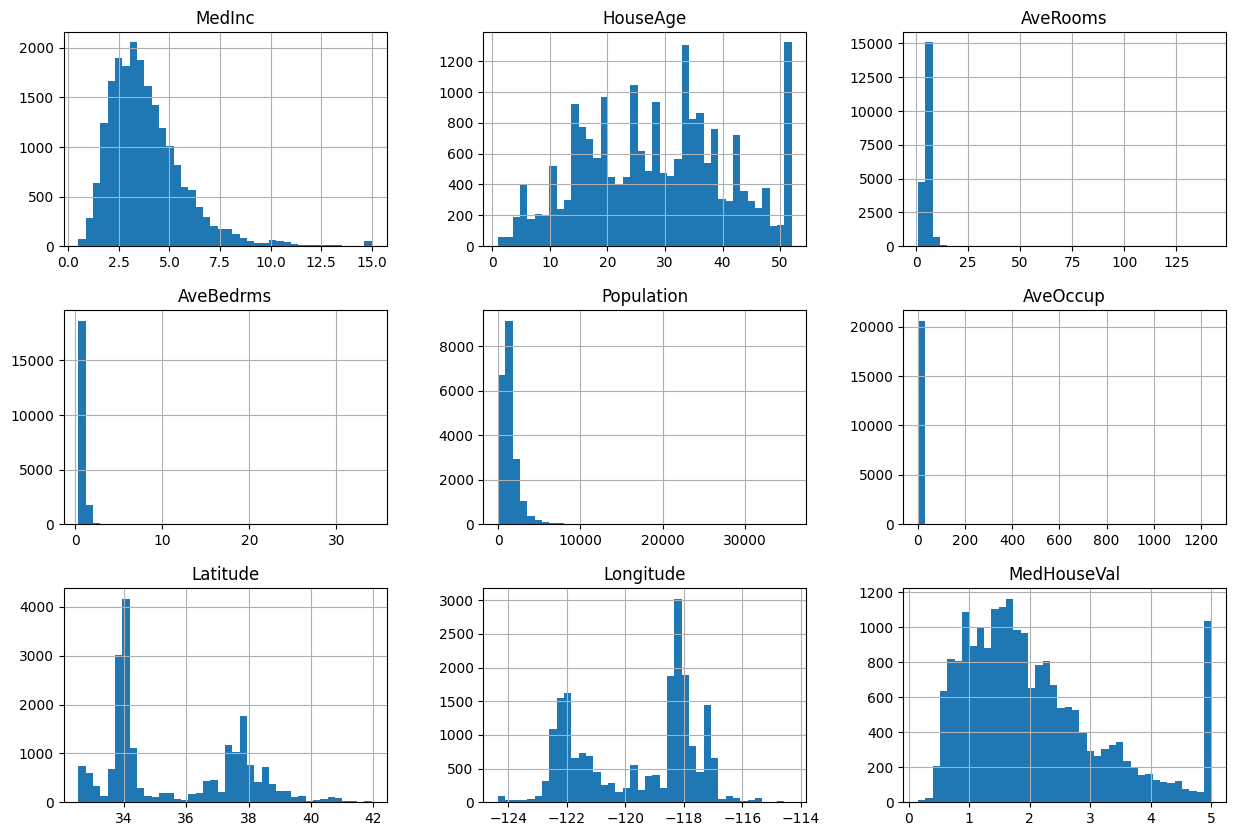

In [9]:
df.hist(bins=40, figsize=(15, 10))

1.   Средний доход людей в блочной группе в основном расположен от 70 до 900 тыс. долларов.
2.   Средний возраст домов распределен достаточно плавно от 1 до 52 лет, но наблюдается всплеск для 52 лет.
3.   Среднее кол-во комнат на домохозяйство распределено в основном от 1 до 7 штук и немного от 7 до 14 штук.
4.   Среднее кол-во спален в основном распределено от 1 до 5 штук.
5.   Численность населения в основном распределена от 3 до 5000, больше всего от 100 до 1600.
6.   Среднее число занятых в домохозяйстве в основном равно 3.
7.   Средняя стоимость дома в блочной группе почти одинаково распределена от 50 тыс. долларов до 200 тысю долларов. Дальше чем дороже средняя стоимость дома тем меньше таких блочных групп, кроме домов за 500 тыс. долларов, их наблюдается резкий скачок.



## Корреляция аттрибутов

Посмотрим на корреляцию без широты и долготы блочной группы.

<Axes: >

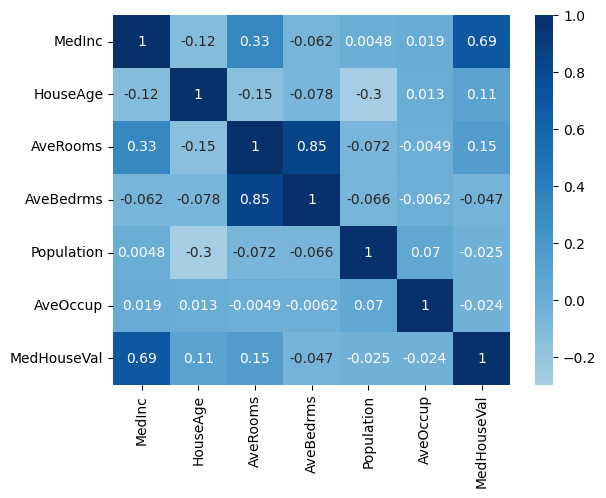

In [11]:
sns.heatmap(df.drop(columns=["Latitude", "Longitude"]).corr(), center=0, annot=True, cmap="Blues")

Сильнее всего на целевой атрибут (MedHouseVal) влияет средний заработок с положительной корреляцией. Вторыми по влиянию являются атрибуты среднего возраста домов в блочной группе и среднего кол-ва комнат с положительной корреляцией. Также можно видеть достаточно большую положительную корреляцию атрибутов кол-ва комнат и кол-ва спален, что вполне ожидаемо.

Попробуем понять как широта и долгота влият на среднюю стоимость дома.

<Axes: xlabel='Longitude', ylabel='Latitude'>

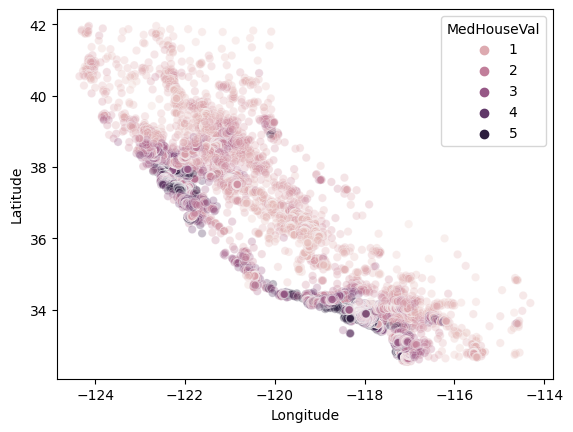

In [18]:
sns.scatterplot(df, x="Longitude", y="Latitude", hue="MedHouseVal", alpha=0.3)

Зная, что дома расположены в Калифорнии, по рисунку можно видеть, что самые дорогие дома расположены у береговой линии, а также неподолеку от крупных кородов.

# Bagging

In [4]:
import sklearn
from sklearn.ensemble import BaseEnsemble
from sklearn.base import clone
from sklearn.tree import DecisionTreeRegressor

class MyBagging(BaseEnsemble):
    def __init__(self, estimator=None, n_estimators=10, random_state=None):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.random_state = random_state

    def predict(self, X):
        return np.mean([estimator.predict(X) for estimator in self.estimators_], axis=0)

    def fit(self, X, y):
        self.estimator_ = self.estimator if self.estimator is not None else DecisionTreeRegressor()
        self.estimators_ = []
        for _ in range(self.n_estimators):
            estimator = clone(self.estimator_)
            X_resample, y_resample = sklearn.utils.resample(X, y)
            estimator.fit(X_resample, y_resample)
            self.estimators_.append(estimator)

# AdaBoost

In [5]:
import sklearn
from sklearn.ensemble import BaseEnsemble
from sklearn.base import clone
from sklearn.tree import DecisionTreeRegressor

class MyAdaBoost(BaseEnsemble):
    def __init__(self, estimator=None, n_estimators=50, random_state=None):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.random_state = random_state

    def predict(self, X):
        return np.around(sum((self.alphas[i] * self.estimators_[i].predict(X) for i in range(self.n_estimators))))

    def fit(self, X, y):
        self.estimator_ = self.estimator if self.estimator is not None else DecisionTreeRegressor(max_depth=3)
        self.estimators_ = []
        self.alphas = [0 for _ in range(self.n_estimators)]
        weight = [1.0 for _ in y]
        for i in range(self.n_estimators):
            estimator = clone(self.estimator_)
            estimator.fit(X, y, weight)
            error = 1 - estimator.score(X, y, weight)
            self.alphas[i] = np.log((1 - error) / error)
            weight = weight * np.exp(self.alphas[i] * (y != estimator.predict(X)))
            weight = weight / sum(weight) * len(y)
            self.estimators_.append(estimator)
        self.alphas = self.alphas / sum(self.alphas)

# Optuna

In [6]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.7 MB/s eta 0:00:00


In [7]:
import optuna
import pathlib
import warnings
from sklearn.model_selection import KFold, cross_validate

warnings.filterwarnings("ignore", category=optuna.exceptions.ExperimentalWarning)

results_path = pathlib.Path("results.csv")

def train_and_save(estimator, param_distributions: dict):
    study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(), direction="maximize")    

    model = optuna.integration.OptunaSearchCV(
        estimator,
        param_distributions,
        scoring="r2",
        n_jobs=2,
        n_trials=None,
        random_state=88,
        study=study,
    )

    results = cross_validate(
        model,
        dataset.data,
        dataset.target,
        cv=KFold(shuffle=True, random_state=8),
        scoring=["r2", "neg_mean_absolute_error"],
        n_jobs=2,
        return_estimator=True,
    )

    for fold_i, estimator_in_fold in enumerate(results["estimator"], start=1):
        print(f"Best params #{fold_i}:", estimator_in_fold.best_params_)

    results = pd.DataFrame(results)
    results["estimator"] = estimator.__class__.__name__
    results["test_mean_absolute_error"] = -results["test_neg_mean_absolute_error"]
    results.drop(columns=["test_neg_mean_absolute_error"], inplace=True)
    results.to_csv(results_path, mode="a", header=not results_path.exists())

# Оборудование

In [22]:
!lscpu |grep 'Model name'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Thread(s) per core'
!free -h --si | awk  '/Mem:/{print $2}'

Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Core(s) per socket:              1
Thread(s) per core:              2
12G


# Запуски

In [8]:
%%time

train_and_save(
    MyBagging(random_state=0),
    param_distributions={"n_estimators": optuna.distributions.CategoricalDistribution([5, 20, 40])},
)

[I 2023-06-08 13:38:57,755] A new study created in memory with name: no-name-0885dda6-873e-4669-b703-ccc66e6c421a


Best params #1: {'n_estimators': 40}
Best params #2: {'n_estimators': 20}
Best params #3: {'n_estimators': 40}
Best params #4: {'n_estimators': 40}
Best params #5: {'n_estimators': 40}
CPU times: user 1.58 s, sys: 770 ms, total: 2.35 s
Wall time: 4min 25s


In [9]:
%%time
from sklearn.ensemble import BaggingRegressor

train_and_save(
    BaggingRegressor(random_state=1, n_jobs=2),
    param_distributions={"n_estimators": optuna.distributions.CategoricalDistribution([5, 20, 40])},
)

[I 2023-06-08 13:43:23,664] A new study created in memory with name: no-name-5061b123-3976-44ea-b1bb-0429a5148a69


Best params #1: {'n_estimators': 40}
Best params #2: {'n_estimators': 40}
Best params #3: {'n_estimators': 40}
Best params #4: {'n_estimators': 40}
Best params #5: {'n_estimators': 40}
CPU times: user 2.75 s, sys: 947 ms, total: 3.7 s
Wall time: 7min 50s


In [10]:
%%time
from sklearn.ensemble import RandomForestRegressor

train_and_save(
    RandomForestRegressor(random_state=2, n_jobs=2),
    param_distributions={
        "n_estimators": optuna.distributions.CategoricalDistribution([10, 40, 80]),
        "max_features": optuna.distributions.CategoricalDistribution([2, "sqrt", None]),
        "max_leaf_nodes": optuna.distributions.CategoricalDistribution([10, 200, None]),
    },
)

[I 2023-06-08 13:51:13,829] A new study created in memory with name: no-name-9c8edf97-244a-4116-8768-890fa6940ee9


Best params #1: {'n_estimators': 40, 'max_features': None, 'max_leaf_nodes': None}
Best params #2: {'n_estimators': 80, 'max_features': None, 'max_leaf_nodes': None}
Best params #3: {'n_estimators': 80, 'max_features': None, 'max_leaf_nodes': None}
Best params #4: {'n_estimators': 80, 'max_features': None, 'max_leaf_nodes': None}
Best params #5: {'n_estimators': 80, 'max_features': None, 'max_leaf_nodes': None}
CPU times: user 7 s, sys: 1.87 s, total: 8.87 s
Wall time: 21min 47s


In [11]:
%%time

train_and_save(
    MyAdaBoost(random_state=3),
    param_distributions={"n_estimators": optuna.distributions.CategoricalDistribution([20, 40, 60])},
)

[I 2023-06-08 14:13:01,447] A new study created in memory with name: no-name-fbd3150b-3d21-440d-bf61-37bb7138c08e


Best params #1: {'n_estimators': 40}
Best params #2: {'n_estimators': 40}
Best params #3: {'n_estimators': 40}
Best params #4: {'n_estimators': 40}
Best params #5: {'n_estimators': 40}
CPU times: user 658 ms, sys: 84.6 ms, total: 742 ms
Wall time: 1min 59s


In [12]:
%%time
from sklearn.ensemble import AdaBoostRegressor

train_and_save(
    AdaBoostRegressor(random_state=4),
    param_distributions={
        "learning_rate": optuna.distributions.CategoricalDistribution([0.03, 0.1, 0.3]),
        "n_estimators": optuna.distributions.CategoricalDistribution([20, 40, 60]),
    },
)

[I 2023-06-08 14:15:00,479] A new study created in memory with name: no-name-042ff885-2187-433e-a8ab-734dca00a4f2


Best params #1: {'learning_rate': 0.1, 'n_estimators': 40}
Best params #2: {'learning_rate': 0.1, 'n_estimators': 40}
Best params #3: {'learning_rate': 0.1, 'n_estimators': 40}
Best params #4: {'learning_rate': 0.1, 'n_estimators': 40}
Best params #5: {'learning_rate': 0.03, 'n_estimators': 60}
CPU times: user 1.38 s, sys: 168 ms, total: 1.54 s
Wall time: 4min 27s


In [13]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

train_and_save(
    GradientBoostingRegressor(random_state=5),
    param_distributions={
        "learning_rate": optuna.distributions.CategoricalDistribution([0.03, 0.1, 0.3]),
        "n_estimators": optuna.distributions.CategoricalDistribution([20, 40, 60]),
        "max_leaf_nodes": optuna.distributions.CategoricalDistribution([10, 200, None]),
    },
)

[I 2023-06-08 14:19:27,802] A new study created in memory with name: no-name-0fd59084-3efb-4c69-b233-fe4e4bed273a


Best params #1: {'learning_rate': 0.3, 'n_estimators': 60, 'max_leaf_nodes': None}
Best params #2: {'learning_rate': 0.3, 'n_estimators': 60, 'max_leaf_nodes': None}
Best params #3: {'learning_rate': 0.3, 'n_estimators': 40, 'max_leaf_nodes': None}
Best params #4: {'learning_rate': 0.3, 'n_estimators': 40, 'max_leaf_nodes': 200}
Best params #5: {'learning_rate': 0.3, 'n_estimators': 60, 'max_leaf_nodes': 200}
CPU times: user 4.05 s, sys: 436 ms, total: 4.49 s
Wall time: 12min 48s


In [14]:
%%time
from sklearn.ensemble import HistGradientBoostingRegressor

train_and_save(
    HistGradientBoostingRegressor(random_state=6),
    param_distributions={
        "learning_rate": optuna.distributions.CategoricalDistribution([0.1, 0.2, 0.3]),
        "max_iter": optuna.distributions.CategoricalDistribution([100, 300, 500]),
        "max_leaf_nodes": optuna.distributions.CategoricalDistribution([3, 15, 31, 50]),
        "early_stopping": optuna.distributions.CategoricalDistribution([False, True]),
    },
)

[I 2023-06-08 14:32:16,253] A new study created in memory with name: no-name-688ecf9c-2b3d-450b-9e00-91fcec8cb7c5


Best params #1: {'learning_rate': 0.2, 'max_iter': 500, 'max_leaf_nodes': 15, 'early_stopping': True}
Best params #2: {'learning_rate': 0.1, 'max_iter': 300, 'max_leaf_nodes': 15, 'early_stopping': False}
Best params #3: {'learning_rate': 0.1, 'max_iter': 500, 'max_leaf_nodes': 15, 'early_stopping': False}
Best params #4: {'learning_rate': 0.1, 'max_iter': 300, 'max_leaf_nodes': 15, 'early_stopping': False}
Best params #5: {'learning_rate': 0.1, 'max_iter': 500, 'max_leaf_nodes': 15, 'early_stopping': False}
CPU times: user 7.24 s, sys: 878 ms, total: 8.12 s
Wall time: 23min 36s


In [15]:
%%time
from xgboost import XGBRegressor

train_and_save(
    XGBRegressor(random_state=7, n_jobs=2),
    param_distributions={
        "tree_method": optuna.distributions.CategoricalDistribution(["exact", "approx", "hist"]),
        "learning_rate": optuna.distributions.CategoricalDistribution([0.03, 0.1, 0.3]),
        "n_estimators": optuna.distributions.CategoricalDistribution([20, 50, 100]),
        "max_leaves": optuna.distributions.CategoricalDistribution([1, 3, 15, 31]),
    },
)

[I 2023-06-08 14:55:53,521] A new study created in memory with name: no-name-458e67a4-06cd-4ff8-938b-ebb40ba6a86f


Best params #1: {'tree_method': 'approx', 'learning_rate': 0.3, 'n_estimators': 100, 'max_leaves': 15}
Best params #2: {'tree_method': 'approx', 'learning_rate': 0.3, 'n_estimators': 100, 'max_leaves': 15}
Best params #3: {'tree_method': 'approx', 'learning_rate': 0.1, 'n_estimators': 100, 'max_leaves': 15}
Best params #4: {'tree_method': 'approx', 'learning_rate': 0.1, 'n_estimators': 100, 'max_leaves': 31}
Best params #5: {'tree_method': 'approx', 'learning_rate': 0.3, 'n_estimators': 100, 'max_leaves': 15}
CPU times: user 6.49 s, sys: 731 ms, total: 7.22 s
Wall time: 21min 29s


In [16]:
%%time
from lightgbm import LGBMRegressor

train_and_save(
    LGBMRegressor(random_state=8, n_jobs=2),
    param_distributions={
        "learning_rate": optuna.distributions.CategoricalDistribution([0.03, 0.1, 0.3]),
        "n_estimators": optuna.distributions.CategoricalDistribution([20, 50, 100]),
        "num_leaves": optuna.distributions.CategoricalDistribution([15, 31, 50]),
    },
)

[I 2023-06-08 15:17:23,769] A new study created in memory with name: no-name-4de9c1b7-252a-49bd-8d10-18569b0fa8b3


Best params #1: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Best params #2: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Best params #3: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Best params #4: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Best params #5: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 15}
CPU times: user 1.88 s, sys: 148 ms, total: 2.03 s
Wall time: 2min 33s


In [17]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00


In [18]:
%%time
from catboost import CatBoostRegressor

train_and_save(
    CatBoostRegressor(random_state=9, thread_count=2),
    param_distributions={
        "n_estimators": optuna.distributions.CategoricalDistribution([100, 300, 500]),
    },
)

[I 2023-06-08 15:20:08,636] A new study created in memory with name: no-name-beb321ee-0bc5-49fa-b662-a41032fc68d5


Best params #1: {'n_estimators': 500}
Best params #2: {'n_estimators': 300}
Best params #3: {'n_estimators': 300}
Best params #4: {'n_estimators': 500}
Best params #5: {'n_estimators': 500}
CPU times: user 943 ms, sys: 106 ms, total: 1.05 s
Wall time: 2min 45s


# Результаты

In [19]:
results = pd.read_csv(results_path)

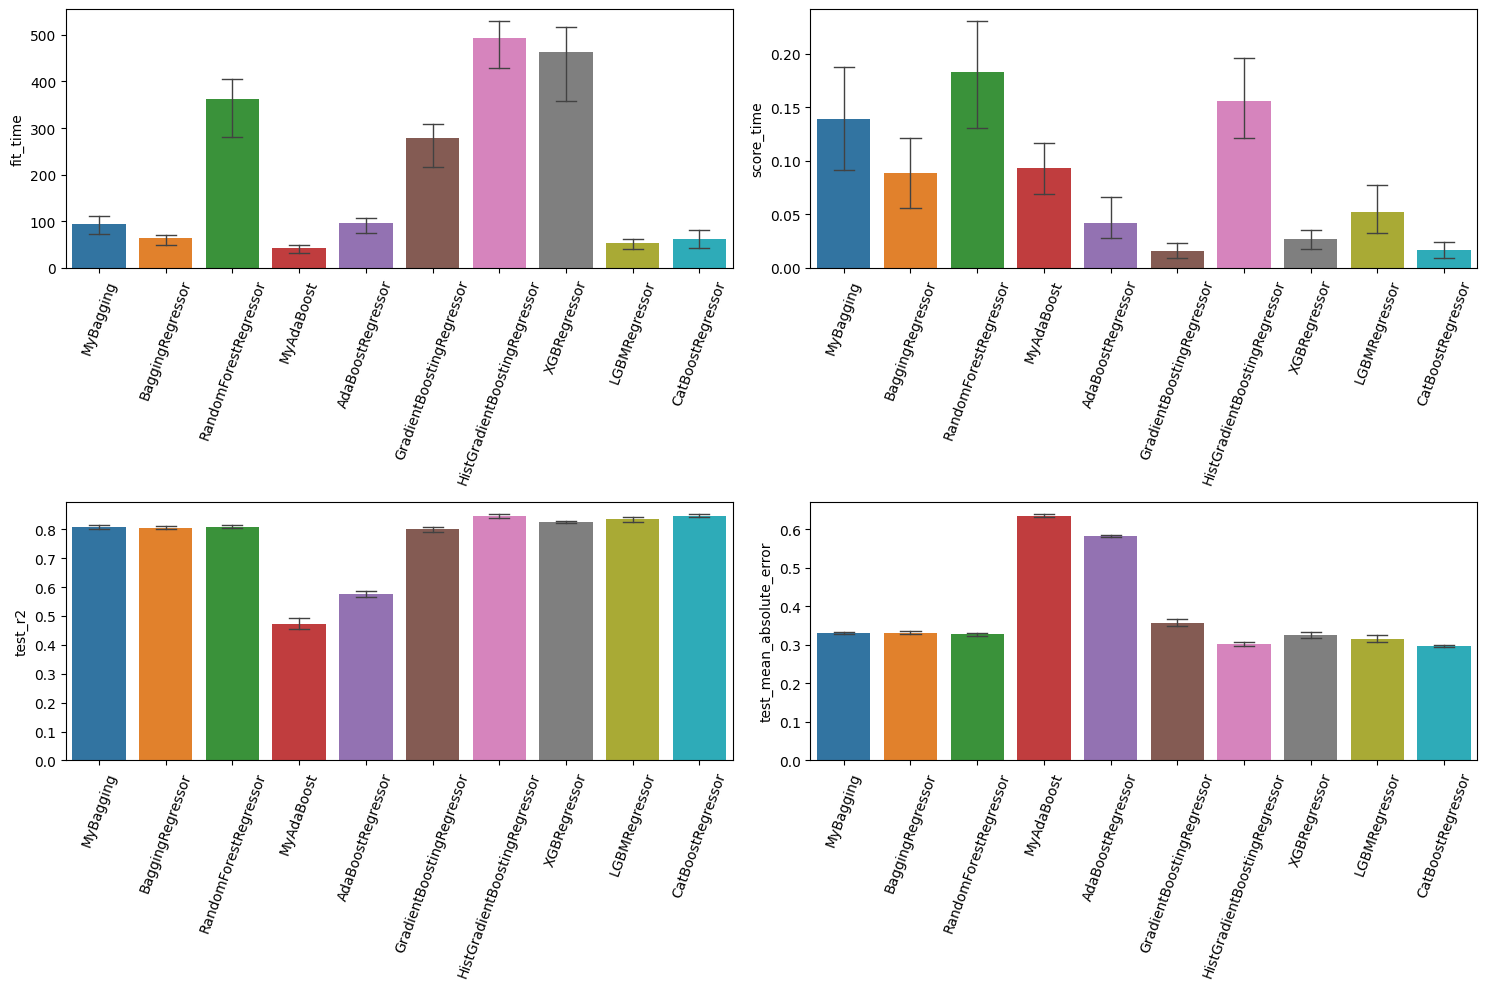

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

for y, ax in zip(
    ["fit_time",
     "score_time",
     "test_r2",
     "test_mean_absolute_error",
    ], axs.flatten()):
    sns.barplot(results[["estimator", y]], x="estimator", y=y, errwidth=1, capsize=0.3, ax=ax)
    ax.tick_params(axis="x", rotation=70)
    ax.set_xlabel(None)

fig.tight_layout()

plt.show()

Лучше всех оказался CatBoostRegressor по всем метрикам и по скорости не сильно отличающийся от первого места. Также хорошо себя показал HistGradientBoostingRegressor, но он плох по скорости. Хуже всего себя показал MyAdaBoost и AdaBoostRegressor.